## Required Modules

<br>

- matplotlib >= 3.1.1
- mplcursors >= 0.5.1
    - use command to install(in notebook) : **!pip install mplcursors**
- numpy >= 1.21.5
- pandas >= 0.25.1
- sklearn >= 0.21.3

## Import Modules

In [79]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors # Use this is for creating a cursor-interactive plot with "%matplotlib notebook"
from sklearn.decomposition import NMF # Use this for training Non-negative Matrix Factorization
from sklearn.utils.extmath import randomized_svd # Use this for training Singular Value Decomposition
from sklearn.manifold import TSNE # Use this for training t-sne manifolding

plt.style.use('ggplot') # You can also use different style

# just for plot checking, use this option
# %matplotlib inline

# for interactive plot
# If you use this option, plot will appear at first-drawn position
%matplotlib notebook

warnings.filterwarnings('ignore')
print('done')

done


## Data Loading

<br>

> ### File description : MovieLens-100K
- movies.csv : list of movies (9742 movies)
- ratings.csv : list of ratings given by users (610 users, 100,836 ratings)

In [80]:
dir = './MovieLens100K/'
df_ratings = pd.read_csv(dir + 'ratings.csv', usecols=['userId', 'movieId', 'rating'])
df_movies = pd.read_csv(dir + 'movies.csv', usecols=['movieId', 'title', 'genres']) # for title-matching
print('done')

done


## Simple EDA (Exploratory Data Analysis)

<br>

- Before starting, let's perform simple data analysis on the given dataset

In [81]:
# 고유 사용자, 고유 영화 갯수 확인
n_users = len(df_ratings['userId'].unique())
n_movies = len(df_ratings['movieId'].unique())

n_users, n_movies # 610 명의 사용자가 9724개의 영화에 평점을 매김을 확인

(610, 9724)

In [82]:
len(df_movies) # len(df_movies) - n_movies 만큼의 평점이 매겨지지 않은 영화가 존재

9742

In [83]:
# ratings의 기술통계량 확인
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

## Generate Utility Matrix $A$

<br>

> ### Problem 1 (2 points)
1. Generate an utility matrix $A$ by using **df_ratings** (store rating values with unique 'movieId' and 'userId')
2. Within a matrix $A$, replace NaN values (unknown ratings) with 0 (zero value)
3. Convert the utility matrix $A$ to **numpy array**

In [84]:
"""
# Utility Matrix의 형태는 (n_movies, n_users)
# 즉 Utility Matrix 의 각 행은 movie, 각 열은 user를 나타냄
"""
# your code here

A = df_ratings.pivot(index = 'movieId', columns = 'userId',values = 'rating')

# 올바른 형태로 utility matrix가 생성되었는지 확인
A = A.copy().fillna(0)
print(A)
print(A.shape)

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193609   0.0  0.0  0.0  0.0 

## Training SVD Model

<br>

> ### Problem 2 (2 points)
1. Decompose utility matrix $A$ into three matrices $U$, $\sum$, and $V^T$ by training SVD model (you can use  randomized_svd() function provided from scikit-learn)
    - Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html

2. After training SVD is completed, perform dot-product of $U$, $\sum$, and $V^T$ to obtain the matrix $A_{approx_{svd}}$ that approximates matrix $A$
    - Note that, **$\sum$ should be a diagonal matrix**, not a vector
    - Before computing $A_{approx_{svd}}$, you will need to transform $\sum$ generated from randomized_svd() to a diagonal matrix

In [85]:
"""
# sklearn에서 제공하는 randomized_svd()를 통해 SVD 모델을 학습하여 U, Sigma, VT를 구함
# k는 분해될 행렬들의 feature/factor 의 크기를 정하는 hyperparameter
# 여러 인자를 조정해서 randomized_svd()를 실행 가능 (자세한 내용은 위의 참고 사이트를 참고)
# 분해된 행렬 U, Sigma, VT의 형태는 (n_movies, k), (k,) (k, n_users)
# 분해된 행렬들을 이용하여 dot-product 연산을 수행하면 원래의 utility matrix와 같은 (n_movies, n_users) 형태의 근사 행렬을 얻을 수 있음
"""

# your code here
import pandas as pd
import numpy as np
from sklearn.utils.extmath import randomized_svd

k = 100
U, Sigma, VT = randomized_svd(A.values,n_components=k,n_iter=5,random_state=None)
# 분해된 행렬이 올바른 형태로 생성되었는지 확인
print(U.shape, Sigma.shape, VT.shape)

S = np.diag(Sigma)
A_approx_svd = np.matmul(np.matmul(U,S),VT)
test = np.matmul(U,VT)
# 근사 행렬이 올바른 형태로 생성되었는지 확인
# print(A_approx_svd)
# print(A)

print(A)
print(pd.DataFrame(A_approx_svd))
print(A_approx_svd.shape)

(9724, 100) (100,) (100, 610)
userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  

## Training NMF Model

<br>

> ### Problem 3 (2 points)
1. Decompose utility matrix $A$ into two matrices $W$ and $H$ by training NMF model (using NMF()).
    - Refer to: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn.decomposition.NMF

2. After training NMF, perform dot-product of $W$ and $H$ to obtain the matrix $A_{approx_{nmf}}$ that approximates matrix $A$

In [86]:
"""
# sklearn에서 제공하는 NMF()를 통해 NMF 모델을 학습하여 W, H를 구함
# SVD와 마찬가지로, k는 분해될 행렬들의 feature/factor 의 크기를 정하는 hyperparameter
# 여러 인자를 조정해서 NMF() 모델을 생성 (자세한 내용은 위의 참고 사이트를 참고)
# 분해된 행렬 W와 H는 .fit(data)를 실행한 후에 구할수 있으며, W와 H의 형태는 (n_movies, k), (k, n_users)
# 분해된 행렬들을 이용하여 dot-product 연산을 수행하면 원래의 utility matrix와 같은 (n_movies, n_users) 형태의 근사 행렬을 구할 수 있음
"""

# your code here

k = 100
model_nmf = NMF(n_components = k, init='random',random_state=0)
W = model_nmf.fit_transform(A)
H = model_nmf.components_

# 분해된 행렬이 올바른 형태로 생성되었는지 확인
print(W.shape, H.shape)

A_approx_nmf = np.matmul(W,H)#a 행렬에 대한 근사행렬

# 근사 행렬이 올바른 형태로 생성되었는지 확인
print(A)
print(pd.DataFrame(A_approx_nmf))
print(A_approx_nmf.shape)

(9724, 100) (100, 610)
userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  ...  4.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  ...  0.0  4.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193583   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193585   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
193587   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
19360

## Compute loss by implementing a custom function

> ### Problem 4 (2 points)
1. Implement **compute_error(actual, prediction)** function that takes matrices 'actual' and 'prediction' as input parameters.
    1. Ignore zero values in the actual maxtrix
    2. Compute SSE and RMSE
    3. Return SSE and RMSE

<br>

2. Implement **compute_error_all(actual, prediction)** function that takes matrices 'actual' and 'prediction' as input parameters.
    1. Do not ignore zero values in the actual matrix (compute all values)
    2. Compute SSE and RMSE
    3. Return SSE and RMSE

In [87]:
"""
# 실제 utility matrix A와 SVD 를 통해 생성된 행렬 A_approx_svd 간의 오차를 계산
# 실제 utility matrix A와 NMF 를 통해 생성된 행렬 A_approx_nmf 간의 오차를 계산
# 오차 값을 계산하기 위해 함수 compute_error(actual, prediction)와 compute_error_all(actual, prediction)를 구현
# 강의시간에 배운 수식을 통해 함수 구현
"""

# your code here

import math

def compute_error(actual, prediction):
    # 매개변수로 입력받은 actual 행렬 안의 0값을 갖는 원소들은 오차 계산에서 제외합니다.
    non_zero_count = np.count_nonzero(actual)
    
    actual = actual.astype('float')
    actual[actual==0] = np.nan
    
    residuals = actual-prediction
    
    sse = np.sum(np.sum(residuals)**2)
    rmse = math.sqrt(sse/non_zero_count)
    
    return sse, rmse

def compute_error_all(actual, prediction):
    # actual 행렬 안의 0값을 갖는 원소들도 포함해서 오차를 계산합니다.
    sse = np.sum(np.sum((actual-prediction)**2))
    rmse = math.sqrt(sse/actual.size)
    return sse, rmse

# print(f"SVD Error(including all zero values): SSE = {compute_error_all(A, A_approx_svd)[0]}, RMSE = {compute_error_all(A, A_approx_svd)[1]}")
# print(f"SVD Error(including all zero values): SSE = {compute_error(A, A_approx_svd)[0]}, RMSE = {compute_error(A, A_approx_svd)[1]}")




In [88]:
print(f"SVD Error(ignoring zero values): SSE = {compute_error(A, A_approx_svd)[0]}, RMSE = {compute_error(A, A_approx_svd)[1]}")
print(f"NMF Error(ignoring zero values): SSE = {compute_error(A, A_approx_nmf)[0]}, RMSE = {compute_error(A, A_approx_nmf)[1]}")

print('\n')

print(f"SVD Error(including all zero values): SSE = {compute_error_all(A, A_approx_svd)[0]}, RMSE = {compute_error_all(A, A_approx_svd)[1]}")
print(f"NMF Error(including all zero values): SSE = {compute_error_all(A, A_approx_nmf)[0]}, RMSE = {compute_error_all(A, A_approx_nmf)[1]}")

SVD Error(ignoring zero values): SSE = 21732483.520908996, RMSE = 14.680703743600453
NMF Error(ignoring zero values): SSE = 34335417.82332282, RMSE = 18.452846263886588


SVD Error(including all zero values): SSE = 378724.9561144853, RMSE = 0.2526821534049165
NMF Error(including all zero values): SSE = 430515.99841401493, RMSE = 0.2694059944820081


## Predict missing (unknown) values in utility matrix $A$ for a specific user


> ### Problem 5 (2 points)

- 실제 평점과 예측 평점을 확인할 수 있는 dataframe 생성을 위해 makePredictions(actual, pred, user) 함수를 정의
- makePredictions() 함수는 user(사용자 번호, user index)를 통해 actual, pred에서 rated movies(seen movies), non-rated movies(unseen movies)를 추출
- 그 다음 앞서 정의했던 df_movies와 추출한 2개의 dataframe을 concat 해줄 것
- column mismatching이 일어날 수 있는데, 우선 dataframe을 모든 column과 concat한 후 불필요한 'movieId' column을 drop 해줄 것
- 이어서 실제로 본 영화 목록을 rated_movies로 정의하고, rating을 기준으로 내림차순 정렬 수행
- 마찬가지로 평점이 부여되지 않은 영화들(평점을 예측하고자하는 영화들)의 목록을 unrated_movies로 정의하고, dataframe의 index를 기준으로 오름차순 정렬 수행

- dataframe의 앞, 뒤를 보는 함수는 .head(), .tail()를 사용할 수 있지만, 중간을 볼 수 있는 함수는 존재하지 않음
- 따라서, 함수 findMiddle(dataframe)을 정의하고, 이 함수는 indexing을 통해 dataframe의 중간 위치를 보여줌
- findMiddle()의 return은 dataframe의 중간 10개 부분

In [89]:
actual = A.iloc[ : ,10]
pred = pd.DataFrame(A_approx_svd).iloc[ : ,10]
df_movies_index = df_movies.set_index(keys=[df_movies.movieId],inplace=False)
pred_index = pd.DataFrame(pred).set_index(keys=[actual.index],inplace=False)

recom = pd.concat([actual, pred_index, df_movies_index] , axis = 1)
recom = recom.drop('movieId',axis=1)
recom.columns = ['actual','pred','title','genres']
print(recom)

rated_movies = recom
unrated_movies = recom[recom.actual == 0]
rated_movies = rated_movies.sort_values(by=['actual'],ascending=False)
unrated_movies = unrated_movies.sort_values(by=['movieId'])
print(rated_movies)
print(unrated_movies)

         actual      pred                                      title  \
movieId                                                                
1           0.0  1.178657                           Toy Story (1995)   
2           0.0  0.460936                             Jumanji (1995)   
3           0.0 -0.003127                    Grumpier Old Men (1995)   
4           0.0 -0.086836                   Waiting to Exhale (1995)   
5           0.0  0.140711         Father of the Bride Part II (1995)   
...         ...       ...                                        ...   
193581      0.0 -0.011316  Black Butler: Book of the Atlantic (2017)   
193583      0.0 -0.009901               No Game No Life: Zero (2017)   
193585      0.0 -0.009901                               Flint (2017)   
193587      0.0 -0.009901        Bungo Stray Dogs: Dead Apple (2018)   
193609      0.0  0.017583        Andrew Dice Clay: Dice Rules (1991)   

                                              genres  
movieId 

In [90]:
# your code here

def makePredictions(actual, pred, user):
    # rated_movies, unrated_movies 생성을 하기 위한 사전작업 dataframe을 정의할 수 있습니다. (약 4~5줄)
    
    #특정 유저의 series 뽑기
    rated_movies_df = actual.iloc[ : ,user]
    prediction_df = pd.DataFrame(pred).iloc[ : ,user]
    
    #인덱스를 movieId로 설정 -> concat 시 같은 인덱스끼리 매칭됨
    df_movies_index = df_movies.set_index(keys=[df_movies.movieId],inplace=False)
    prediction_df_index = pd.DataFrame(prediction_df).set_index(keys=[rated_movies_df.index],inplace=False)

    #concat 진행(인덱스끼리 매칭)
    recommender_df = pd.concat([rated_movies_df, prediction_df_index, df_movies_index] , axis = 1)
    recommender_df = recommender_df.drop('movieId',axis=1)
    recommender_df.columns = ['actual','pred','title','genres']

    #rated_movies, unrated_movies 정의
    rated_movies = recommender_df
    unrated_movies = recommender_df[recommender_df.actual == 0]
    rated_movies = rated_movies.sort_values(by=['actual'],ascending=False)
    unrated_movies = unrated_movies.sort_values(by=['movieId'])
    print(len(rated_movies))
    print(len(unrated_movies))
    
    return rated_movies, unrated_movies


def findMiddle(dataframe):
    # dataframe의 중간 부분을 반환하는 함수입니다.
    # return은 dataframe의 중간 10개 부분들 입니다. (dataframe 형식)
    length = len(dataframe)
    middle = int(length/2)
    
    return dataframe[middle-5:middle+5]


In [91]:
"""
# 임의의 사용자를 1명 선정하고, 앞서 작성한 함수에 svd, nmf의 근사 행렬을 인자로 전달
"""

# your code here

# 임의의 사용자 (정수)를 선택
userNumber = 10
prediction_with_rated_svd, prediction_with_unrated_svd = makePredictions(A, A_approx_svd, userNumber) # 실제 Utility Matrix와 svd를 통해 근사한 행렬 간의 비교
prediction_with_rated_nmf, prediction_with_unrated_nmf = makePredictions(A, A_approx_nmf, userNumber) # 실제 Utility Matrix와 nmf를 통해 근사한 행렬 간의 비교

9742
9660
9742
9660


In [92]:
prediction_with_rated_svd.head(10)

,actual,pred,title,genres
movieId,,,,
593,5.0,3.436402,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
110,5.0,4.434242,Braveheart (1995),Action|Drama|War
457,5.0,3.702072,"Fugitive, The (1993)",Thriller
1784,5.0,1.441643,As Good as It Gets (1997),Comedy|Drama|Romance
1584,5.0,0.700420,Contact (1997),Drama|Sci-Fi
1721,5.0,1.866831,Titanic (1997),Drama|Romance
1693,5.0,0.488218,Amistad (1997),Drama|Mystery
1101,5.0,1.656699,Top Gun (1986),Action|Romance
1408,5.0,0.806970,"Last of the Mohicans, The (1992)",Action|Romance|War|Western


In [93]:
prediction_with_rated_nmf.head(10)

,actual,pred,title,genres
movieId,,,,
593,5.0,2.569318,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
110,5.0,3.420416,Braveheart (1995),Action|Drama|War
457,5.0,2.763859,"Fugitive, The (1993)",Thriller
1784,5.0,0.373212,As Good as It Gets (1997),Comedy|Drama|Romance
1584,5.0,0.372980,Contact (1997),Drama|Sci-Fi
1721,5.0,0.728238,Titanic (1997),Drama|Romance
1693,5.0,0.100783,Amistad (1997),Drama|Mystery
1101,5.0,0.653420,Top Gun (1986),Action|Romance
1408,5.0,0.264580,"Last of the Mohicans, The (1992)",Action|Romance|War|Western


In [94]:
prediction_with_unrated_svd.head(10)

,actual,pred,title,genres
movieId,,,,
1,0.0,1.178657,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,0.0,0.460936,Jumanji (1995),Adventure|Children|Fantasy
3,0.0,-0.003127,Grumpier Old Men (1995),Comedy|Romance
4,0.0,-0.086836,Waiting to Exhale (1995),Comedy|Drama|Romance
5,0.0,0.140711,Father of the Bride Part II (1995),Comedy
7,0.0,0.320142,Sabrina (1995),Comedy|Romance
8,0.0,-0.047533,Tom and Huck (1995),Adventure|Children
9,0.0,0.397526,Sudden Death (1995),Action
11,0.0,0.648159,"American President, The (1995)",Comedy|Drama|Romance


In [95]:
prediction_with_unrated_nmf.head(10)

,actual,pred,title,genres
movieId,,,,
1,0.0,1.708097,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,0.0,0.626621,Jumanji (1995),Adventure|Children|Fantasy
3,0.0,0.561129,Grumpier Old Men (1995),Comedy|Romance
4,0.0,0.000203,Waiting to Exhale (1995),Comedy|Drama|Romance
5,0.0,0.425195,Father of the Bride Part II (1995),Comedy
7,0.0,0.519980,Sabrina (1995),Comedy|Romance
8,0.0,0.011620,Tom and Huck (1995),Adventure|Children
9,0.0,0.381323,Sudden Death (1995),Action
11,0.0,0.584425,"American President, The (1995)",Comedy|Drama|Romance


In [96]:
prediction_with_unrated_svd.tail(10)

,actual,pred,title,genres
movieId,,,,
193565,0.0,-0.009901,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
193567,0.0,-0.008487,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
193571,0.0,-0.011316,Silver Spoon (2014),Comedy|Drama
193573,0.0,-0.011316,Love Live! The School Idol Movie (2015),Animation
193579,0.0,-0.009901,Jon Stewart Has Left the Building (2015),Documentary
193581,0.0,-0.011316,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,0.0,-0.009901,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,0.0,-0.009901,Flint (2017),Drama
193587,0.0,-0.009901,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [97]:
prediction_with_unrated_nmf.tail(10)

,actual,pred,title,genres
movieId,,,,
193565,0.0,0.000000,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
193567,0.0,0.000000,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
193571,0.0,0.000000,Silver Spoon (2014),Comedy|Drama
193573,0.0,0.000000,Love Live! The School Idol Movie (2015),Animation
193579,0.0,0.000000,Jon Stewart Has Left the Building (2015),Documentary
193581,0.0,0.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,0.0,0.000000,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,0.0,0.000000,Flint (2017),Drama
193587,0.0,0.000000,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [98]:
findMiddle(prediction_with_unrated_svd)

,actual,pred,title,genres
movieId,,,,
7340,0.0,-0.042384,Just One of the Guys (1985),Comedy
7344,0.0,-0.010368,"Wrong Arm of the Law, The (1963)",Comedy|Crime
7345,0.0,0.083799,Agent Cody Banks 2: Destination London (2004),Action|Adventure|Children|Comedy
7346,0.0,0.009491,"Girl Next Door, The (2004)",Comedy|Romance
7347,0.0,-0.132662,Secret Window (2004),Mystery|Thriller
7348,0.0,0.036494,Spartan (2004),Thriller
7349,0.0,-0.017850,Broken Wings (Knafayim Shvurot) (2002),Drama
7352,0.0,0.084226,Wilbur Wants to Kill Himself (2002),Comedy|Drama|Romance
7354,0.0,0.020660,Mad Dog and Glory (1993),Comedy|Drama|Romance


In [99]:
findMiddle(prediction_with_unrated_nmf)

,actual,pred,title,genres
movieId,,,,
7340,0.0,0.000000,Just One of the Guys (1985),Comedy
7344,0.0,0.000000,"Wrong Arm of the Law, The (1963)",Comedy|Crime
7345,0.0,0.136567,Agent Cody Banks 2: Destination London (2004),Action|Adventure|Children|Comedy
7346,0.0,0.009979,"Girl Next Door, The (2004)",Comedy|Romance
7347,0.0,0.000000,Secret Window (2004),Mystery|Thriller
7348,0.0,0.000000,Spartan (2004),Thriller
7349,0.0,0.000000,Broken Wings (Knafayim Shvurot) (2002),Drama
7352,0.0,0.000000,Wilbur Wants to Kill Himself (2002),Comedy|Drama|Romance
7354,0.0,0.000000,Mad Dog and Glory (1993),Comedy|Drama|Romance


## Visualize movie embeddings using T-SNE


> ### Extra Credit (2 points)

- NMF에서 분해되어 나온 행렬 W는 movie에 대한 잠재 표현(latent representation)을 갖고 있음
    - 마찬가지로, SVD에서 분해되어 나온 행렬 U도 movie에 대한 잠재 표현을 가짐
- 잠재 공간에서 실제 영화들이 NMF를 통해 어떻게 임베딩 되었는지 2차원 상으로 변환해 확인할 수 있으며, 대표적인 방법으로 t-sne을 사용할 수 있음
- 여러 인자를 조정해서 TSNE() 모델을 생성 가능 (자세한 내용은 공식 아래 사이트 참고)
    - t-sne 참고 사이트: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    - t-sne 학습 과정에 시간이 다소 소요될 수 있음
- t-sne에서 fit()된 결과를 W_embedded에 저장
- W_embedded.embedding_ 으로 변환된 임베딩 결과물을 확인

In [101]:
# your code here
# 맨마지막 슬라이드처럼 시각화하기(100차원이면 2차원으로 표현할 수 없지만 T-SNE를 사용하면 가능함)
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components = 2)
W_embedded = model_tsne.fit(W)

# 실제 2차원으로 변환되었는지 확인
# 변환된 결과는 (n_movies, 2)의 형태
print(W_embedded.embedding_.shape)
print(pd.DataFrame(W_embedded.embedding_))
print(df_movies)

(9724, 2)
              0          1
0      5.270154 -82.947296
1     -8.042405 -84.236816
2      5.227739 -83.146255
3     56.292534 -38.811207
4    -29.217451 -63.930531
...         ...        ...
9719 -30.821039  22.586836
9720 -30.014738  22.882359
9721 -30.014738  22.882359
9722 -30.014738  22.882359
9723 -16.607487  11.335584

[9724 rows x 2 columns]
      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: De

- Plot하기 위해 각 영화 임베딩과 movie dataframe(df_movies)을 결합
- 하지만 위 EDA에서 알 수 있듯이, movie.csv(df_movies)엔 사용자들이 평점을 매기지 않은 영화들이 존재함
- 따라서, 임베딩과 각 영화의 index를 맞추기 위한 작업이 필요함

- 먼저, numpy array로 변환 안된 (즉 dataframe 형태인) Utility matrix를 load하고, index들을 list로 추출
- df_movies에서 'movieId'가 추출한 list에 있는 경우만을 추출 (그러면 이제 df_movies엔 평점이 매겨진 영화들만이 남게 됨)

- (주의! 이때 reset_index(drop=True) 옵션을 사용해줘야 임베딩과 df_movies를 올바르게 결합할 수 있음)
- (그렇지 않으면 index-mismatching이 발생해 NaN값이 생성됨)

- 추출된 내용을 movie_with_embedding에 대입
- movie_with_embedding의 각 끝 열에 앞서 구한 임베딩을 열로 추가
- embedding은 (n_movies, 2)의 형태이므로, 각 column을 1개씩 'tsne1', 'tsne2'로써 movie_with_embedding의 column으로 추가
- 삽입 시, 형태를 맞추기 위해선 .reshape() method가 필요함

In [102]:
# your code here

# 앞서 정의헀던 Utility Matrix와 동일한 방법으로 A2를 정의 (numpy array로 변환할 필요 없음)
A2 = df_ratings.pivot(index = 'movieId', columns = 'userId',values = 'rating')

# allList엔 A2의 index 값(즉, movieId)들을 list로 변환한 내용이 들어있음
allList = A2.index

# movie_with_embedding은 df_movies에서 allList와 일치하는 부분만을 가지게 됨
# movie_with_embedding에 'tsne1', 'tsne2' column을 추가 (추가하는 내용은 각각 임베딩의 첫번째 column, 두번째 column)
movie_with_embedding = df_movies[df_movies['movieId'].isin(allList)].reset_index(drop=True)

movie_with_embedding['tsne1'] = pd.DataFrame(W_embedded.embedding_)[0]
movie_with_embedding['tsne2'] = pd.DataFrame(W_embedded.embedding_)[1]

In [103]:
# 최종적으로 Plotting을 위해 생성한 dataframe이 어떤 모습으로 생겼는지 확인
# 이때, dataframe에 NaN값이 있어서는 안됨
movie_with_embedding

,movieId,title,genres,tsne1,tsne2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.270154,-82.947296
1,2,Jumanji (1995),Adventure|Children|Fantasy,-8.042405,-84.236816
2,3,Grumpier Old Men (1995),Comedy|Romance,5.227739,-83.146255
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,56.292534,-38.811207
4,5,Father of the Bride Part II (1995),Comedy,-29.217451,-63.930531
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,-30.821039,22.586836
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,-30.014738,22.882359
9721,193585,Flint (2017),Drama,-30.014738,22.882359
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,-30.014738,22.882359


- tsne1, tsne2를 통해 scatter plot을 그릴 것
- 'mplcursors'를 통해 각 point마다 확인하고 싶은 정보를 labelling 해줄 것
- 이 기능을 사용하게 되면 point마다 text를 plot해줄 필요가 없고, 마우스 커서 클릭으로 point의 정보를 볼 수 있음
- 상단 예시 코드에서 YOUR_ANNOTATION_LIST를 적절히 선택해 각 point마다의 제목 또는 장르를 확인할 수 있음
- 이 함수를 사용하기 위해서는 '%matplotlib notebook' 이 필요함

```python
mplcursors.cursor(multiple = True).connect(
    "add", lambda sel: sel.annotation.set_text(
          YOUR_ANNOTATION_LIST[sel.target.index]
))
```

<IPython.core.display.Javascript object>


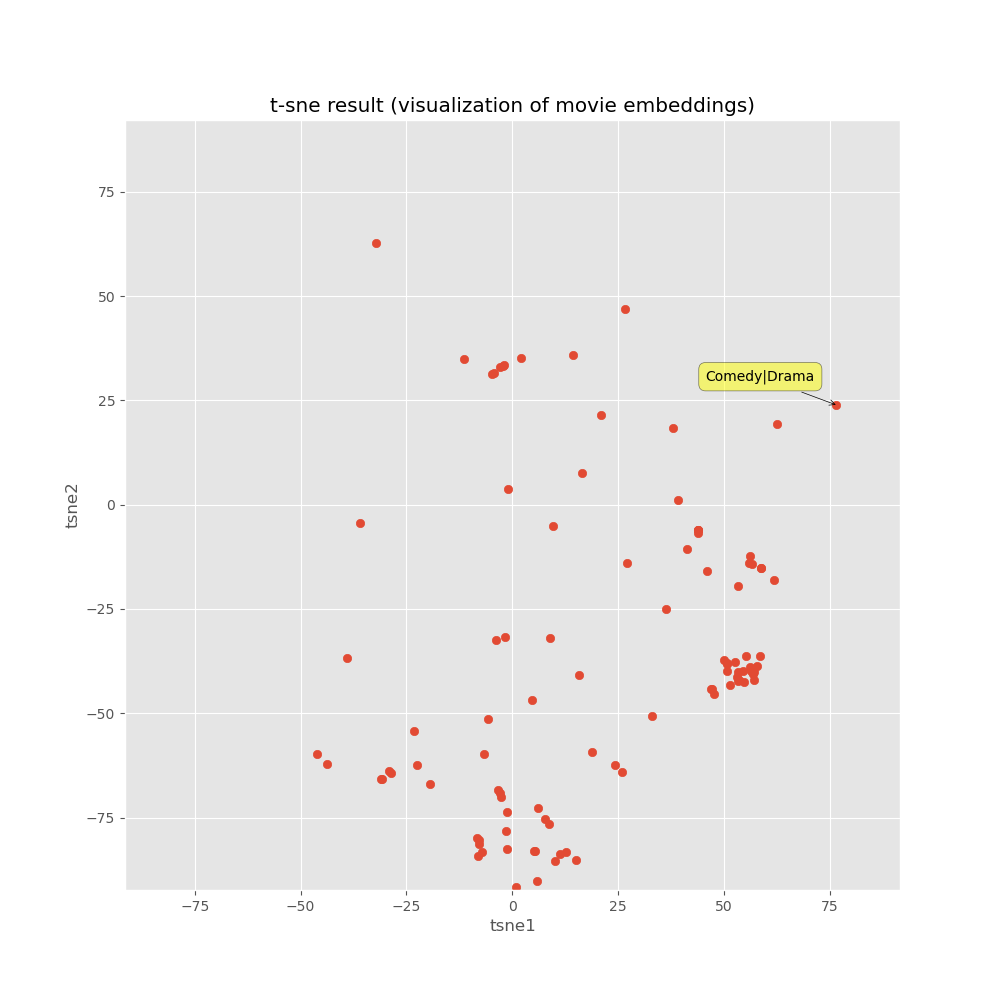

In [108]:
plt.rcParams['figure.figsize'] = [10, 10] # you can change size for your style
plt.xlim(movie_with_embedding['tsne1'].min(), movie_with_embedding['tsne1'].max()) # 축 범위 조정
plt.ylim(movie_with_embedding['tsne2'].min(), movie_with_embedding['tsne2'].max()) # 축 범위 조정

# your code here
# Scatter plot을 그리기
# ******한번에 할 시 딜레이가 너무 심해서 0~100로 범위 조정******
scatter = plt.scatter(movie_with_embedding['tsne1'][0:100],movie_with_embedding['tsne2'][0:100])
tt = movie_with_embedding['genres'].values

plt.xlabel('tsne1')
plt.ylabel('tsne2')



mplcursors.cursor(scatter,hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(
          #YOUR_ANNOTATION_LIST[movie_with_embedding['genres']]
        tt[sel.target.index]
))
# 위의 mplcursors 코드를 이용해 각 point마다 labelling을 할 수 있습니다.
# YOUR_ANNOTATION_LIST는 영화 제목이 되어도 좋고, 영화 장르가 되어도 좋습니다.
# (직관성을 위해 '영화장르'로 labelling 하는 것을 추천합니다.)

plt.title('t-sne result (visualization of movie embeddings)')
plt.show()